In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Review 

- **(Tables)** - to be completed on https://pollev.com/jeremysanchez

- **(Bar chart variants)** I would not worry about the technical details of the code until next week! Right now, I just want you to see the different styles of bar chart that we might use.

In [2]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


### Bar chart variant: one categorical attribute

In [3]:
flavor_table = cones.group('Flavor')
flavor_table

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


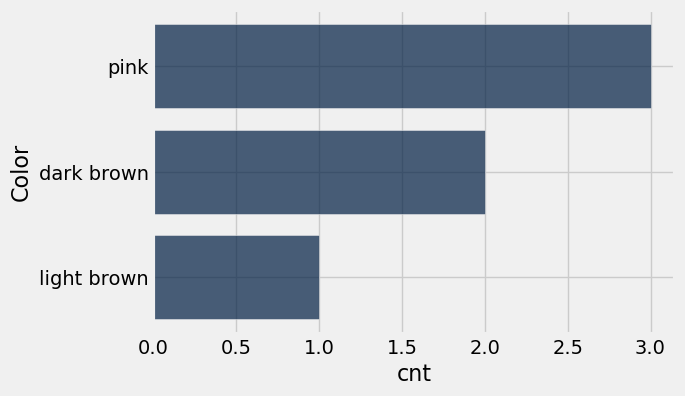

In [52]:
cones.group('Color').relabeled('count', 'cnt').sort('cnt', descending=True).barh('Color')
plots.show()

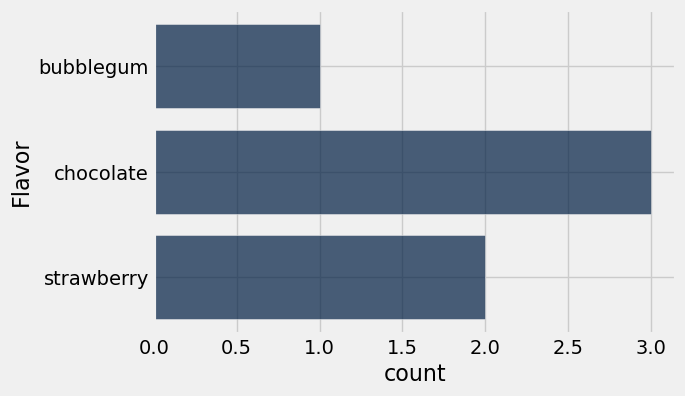

In [6]:
flavor_table.barh('Flavor')
plots.show()

### Bar chart variant: one categorical attribute, one numerical attribute

In [7]:
cone_average_price_table = cones.drop('Color').group('Flavor', np.average)
cone_average_price_table

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


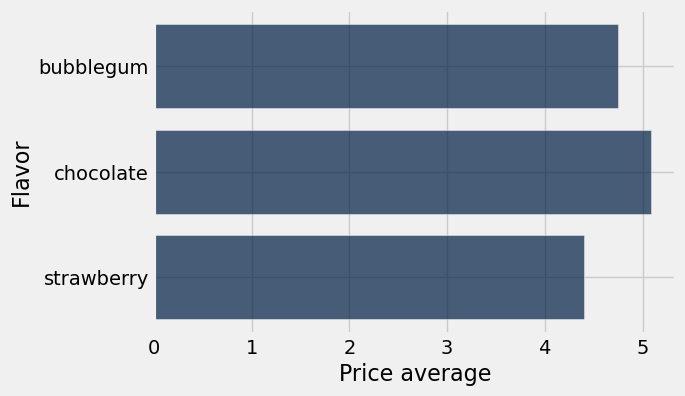

In [10]:
cone_average_price_table.barh('Flavor')
plots.show()

### Bar chart variant: two categorical attributes

In [11]:
cones_pivot_table = cones.pivot('Flavor','Color')
cones_pivot_table

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


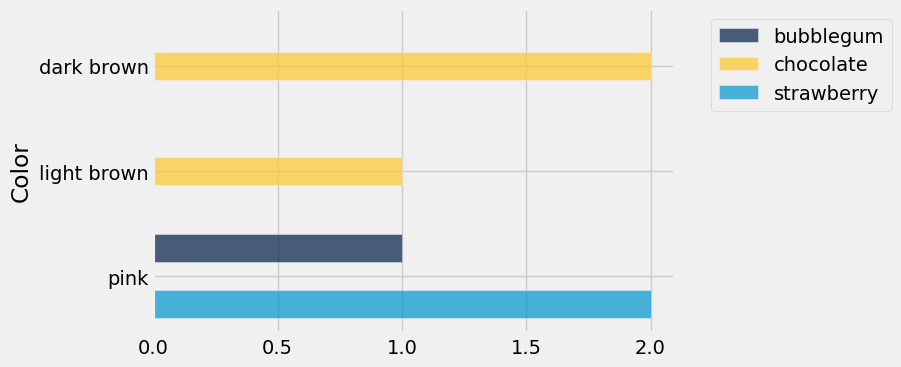

In [45]:
cones_pivot_table.barh('Color')
plots.show()

## New material

### Every variable has a distribution

In [13]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies.show(6)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956


In [14]:
studio_distribution = top_movies.group('Studio')

In [15]:
studio_distribution.show(6)

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24


_____

### Visualizing distributions

#### **Task:** Visualize the distribution of studios responsible for the highest grossing movies as of 2017.

In [20]:
studio_distribution.barh('Studio')

In [21]:
studio_distribution.sort('count', descending=True).barh('Studio')
print("Five studios are largely responsible for the highest grossing movies")

Five studios are largely responsible for the highest grossing movies


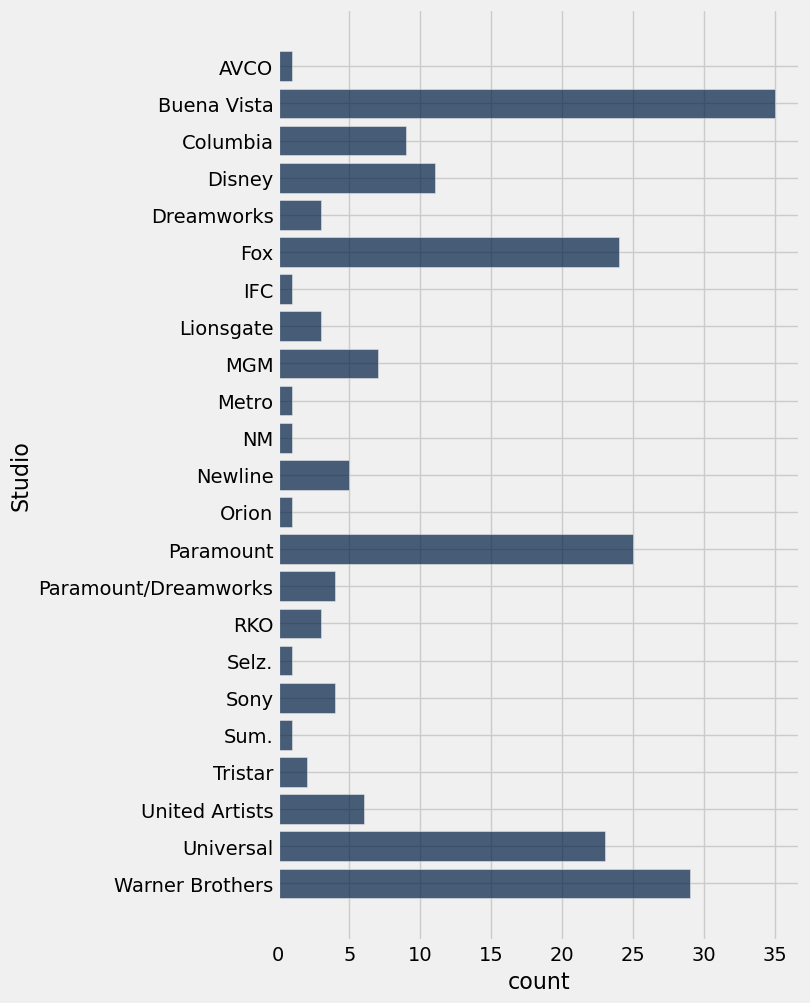

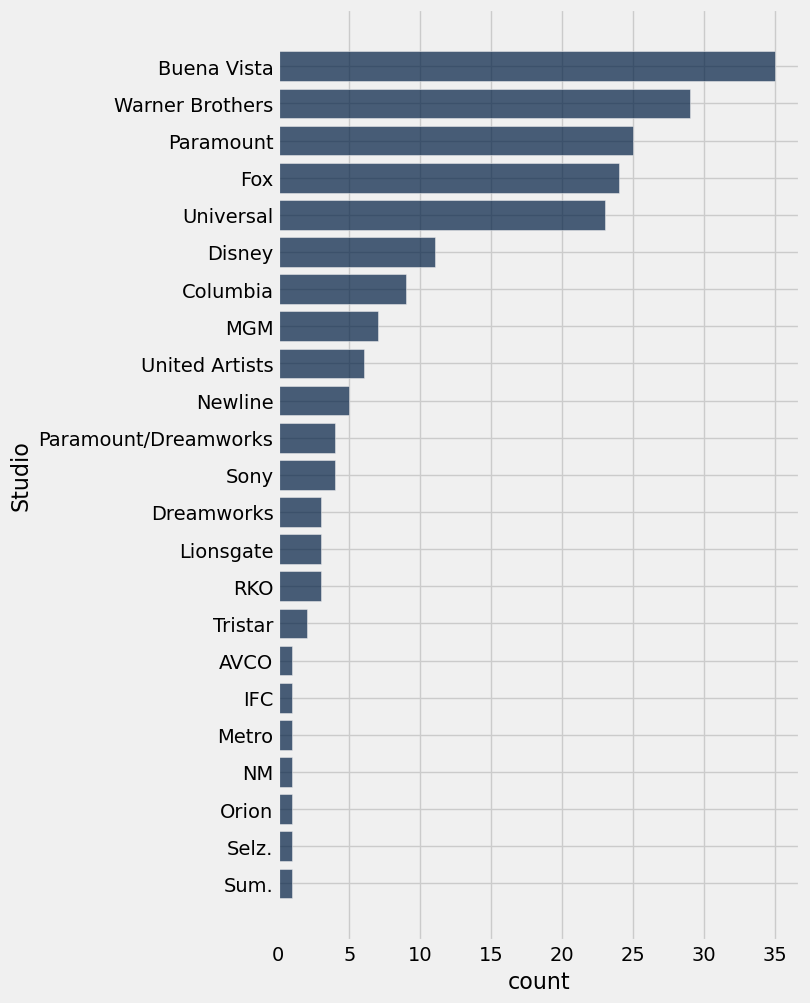

In [22]:
plots.show()

### Use binning for numerical distributions

#### **Task**: Visualize the distribution of how long the highest grossing movies as of 2017 have been out (in years).

In [23]:
ages = 2025 - top_movies.column('Year')
ages

array([ 86,  48,  60,  43,  28,  69,  50,  60,  52,  88,  10,  64,  45,
        66,  16,  42,  32,  26,  31,  52,  44,  58,  84,  10,  53,  31,
        61,  47,  13,  60,  17,  58,  66,  41,  21,  56,  55,  23,  29,
        35,  85,  62,  41,  61,  55,  52,  72,  19,  69,  83,  51,  36,
        80,  22,  22,  51,   9,  75,  21,  73,  61,  47,  21,  20,  40,
        23,  13,  26,  47,  43,  48,   8,   9,  64,  24,  70,  48,  63,
        50,  49,  79,  53,  24,  29,  28,  68,  16,  62,  65,  50,  55,
        41,  10,  23,  32,  33,  15,  35,  12,  79,  13,  22,  72,  71,
        28,  36,  24,  12,  18,  12,  34,  84,  25,  39,  14,  26,  24,
        18,  12,   9,  22,  18,  39, 104,  27,   8,  51,  72,  41,  34,
        20,  20,  18,  23,  32,  71,  17,  14,  21,  17,  30,   8,  35,
        43,  57,  37,   9,  58,  10,  11,  46,  27,  65,  43,  18,  40,
        30,   9,  35,  51,  15,  21,  25,  33,   9,  38,  23,  11,  10,
        29,  11,  10,  48,  44,  26,  16,  22,  21,  57,  25,  2

In [24]:
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,86
Star Wars,Fox,460998007,1583483200,1977,48
The Sound of Music,Fox,158671368,1266072700,1965,60
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
Titanic,Paramount,658672302,1204368000,1997,28
The Ten Commandments,Paramount,65500000,1164590000,1956,69
Jaws,Universal,260000000,1138620700,1975,50
Doctor Zhivago,MGM,111721910,1103564200,1965,60
The Exorcist,Warner Brothers,232906145,983226600,1973,52
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88


In [25]:
top_movies.select('Title', 'Age').show(6)

Title,Age
Gone with the Wind,86
Star Wars,48
The Sound of Music,60
E.T.: The Extra-Terrestrial,43
Titanic,28
The Ten Commandments,69


In [26]:
min(ages), max(ages)

(8, 104)

- If you want to make equally sized bins, `np.arange()` is a great tool to help you.

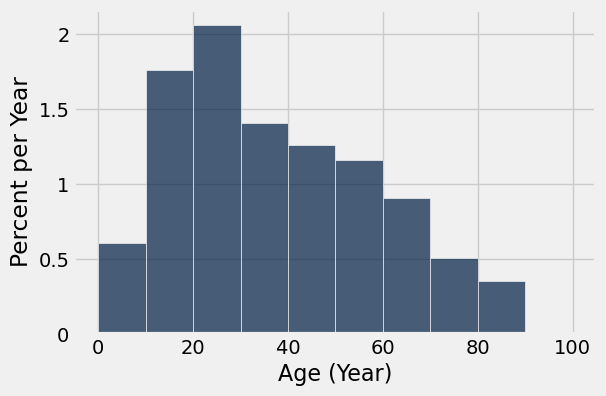

In [53]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')
plots.show()

- Otherwise, you can pick your own bins. These are just bins that we picked out.


In [28]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101)

In [29]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,12
10,18
15,42
25,44
40,59
65,24
101,0


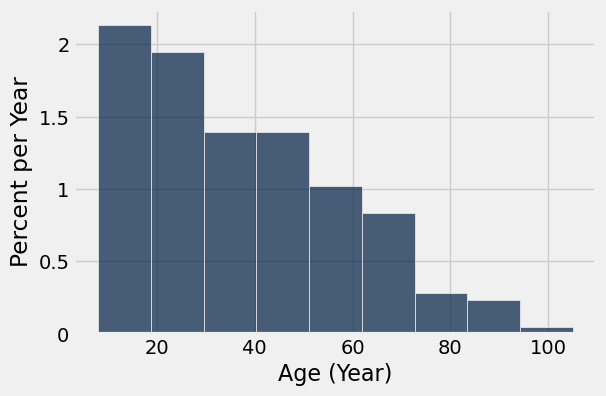

In [62]:
top_movies.hist('Age', bins=np.linspace(min(ages), max(ages)+1, 10), unit='Year')
plots.show()

**Note:** The last "bin" does not include any observations!!

### Introducing the histogram and the area principle

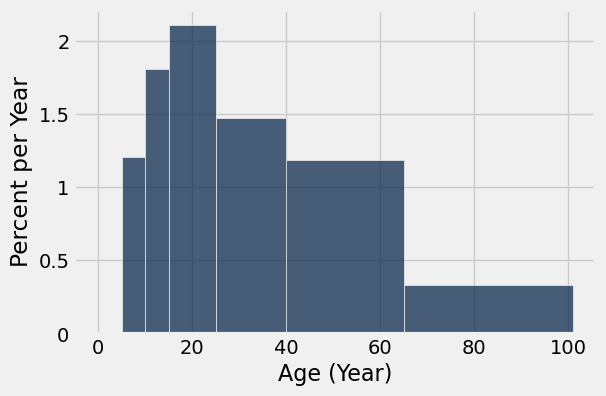

In [31]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')
plots.show()

#### **Discussion Question (1 min)**: Compare the bins $[25, 40)$ and $[40, 65)$. 

- Which one has more movies?
- Which one is more crowded?

### Challenge tasks

#### **Task**: Find the height of the $[40,65)$ bin in the histogram above.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

Add a column containing what percent of movies are in each bin (the **area** of each bin)

In [32]:
binned_data = binned_data.with_column('Percent', 100*binned_data.column('Age count')/top_movies.num_rows)

In [33]:
binned_data.show()

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12
101,0,0


In [34]:
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [35]:
width = 65-40
height = percent / width

In [36]:
height

1.18

#### **Task**: Find the heights of the (rest of the) bins.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

Remember that the last row in the table does not represent a bin!

In [37]:
height_table = binned_data.take(np.arange(binned_data.num_rows - 1))
height_table 

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12


Remember `np.diff`?

In [38]:
bin_widths = np.diff(binned_data.column('bin'))

In [39]:
bin_widths

array([ 5,  5,  5, 10, 15, 25, 36])

In [40]:
height_table = height_table.with_column('Width', bin_widths)
height_table

bin,Age count,Percent,Width
0,0,0,5
5,12,6,5
10,18,9,5
15,42,21,10
25,44,22,15
40,59,29.5,25
65,24,12,36


In [41]:
height_table = height_table.with_column('Height',
                                        height_table.column('Percent')/height_table.column('Width'))

In [42]:
height_table

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,12,6,5,1.2
10,18,9,5,1.8
15,42,21,10,2.1
25,44,22,15,1.46667
40,59,29.5,25,1.18
65,24,12,36,0.333333


To check our work one last time, let's see if the numbers in the last column match the heights of the histogram:

In [43]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

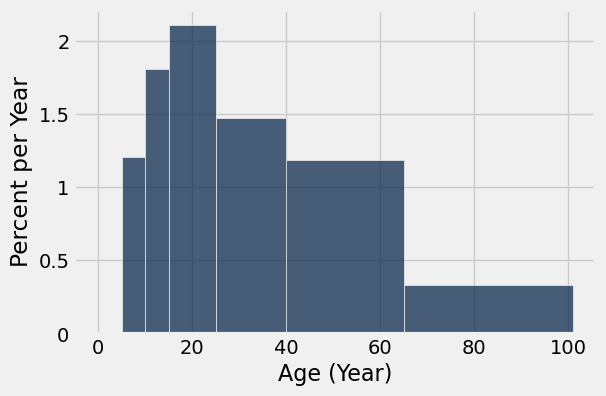

In [44]:
plots.show()